# Demonstration of statistical clear sky fitting

6/24/2025

This notebook demontrates how to use the newly updated clear sky fitting method, based on smooth, periodic quantile estimation. The basic steps are:

- load data
- run pipeline
- estimate clear sky model

## Notebook setup and library imports

In [1]:
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

## Load data

We use NREL's PVDAQ API with a function from the Solar Data Tools DataIO module

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 4.6 seconds       



## Run main pipeline

In [3]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col="ac_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:10<00:00,  1.47s/it]



total time: 10.28 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.11s
Cleaning                   0.11s
Filtering/Summarizing      8.06s
    Data quality           0.09s
    Clear day detect       0.16s
    Clipping detect        4.04s
    Capacity change detect 3.77s



## Fit clear sky model

In [4]:
dh.fit_statistical_clear_sky_model()

100%|████████████████████████████████████████████| 1/1 [04:04<00:00, 244.41s/it]


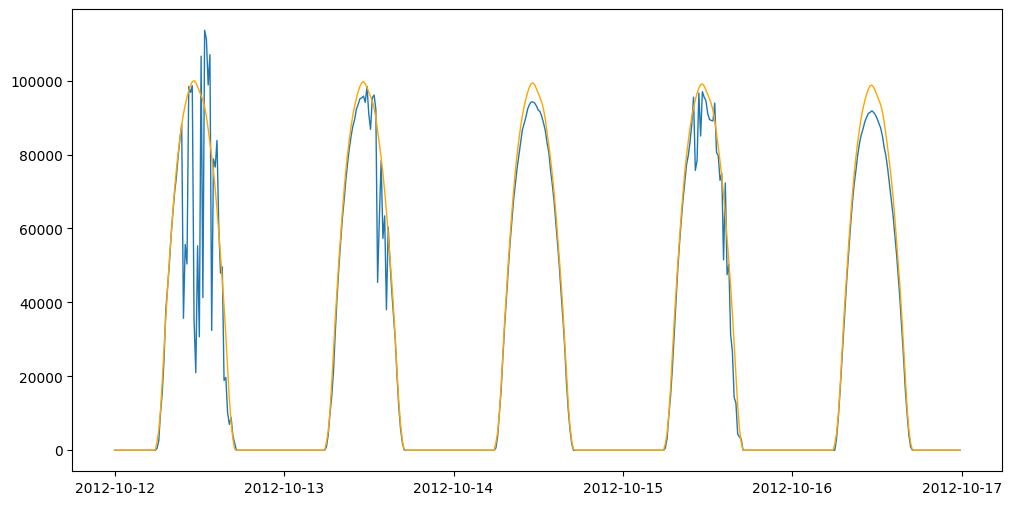

In [7]:
dh.plot_daily_signals(show_clear_model=True, start_day=650);

The estimated clear sky signal is available in the `self.scsf` attribute

In [8]:
dh.scsf

array([901.84114053, 901.84114053, 901.84114053, ...,   0.        ,
         0.        ,   0.        ], shape=(140256,))

The clear sky fitting module is a wrapper on the more general quantile estimation module. As seen below, estimating the clear sky model is the same as estimating the 0.9 quanile.

In [9]:
dh.quantile_object.quantiles_original

{np.float64(0.9): array([901.84114053, 901.84114053, 901.84114053, ...,   0.        ,
          0.        ,   0.        ], shape=(140256,))}